# Pooled Bias Across Visual Varying Sitmului

Tim's git hub code: https://github.com/TimCSheehan/historyResponseModeling

Holly's data: 'data/WM_noisev8_230316.csv'

The path to the data is: smb://cube.ucsd.edu/pclexp/Holly/Holmes/Data. The .mat files are individual subject's data which I compiled the information that I needed to take a preliminary look at main effects in a .csv file in the same folder.


Holly's Data: 
- [x] kappa - bandwidth of the orientation filter for the target stimuli (low kappa means an orientation that looks more noisy and high kappa is an orientation that looks clearer)
- [x] traj - trajectory which is the trajectory of the response (which way they spun the orientation response line)
- [x] orient - probed item orientation (aka correctAngle)
- [x] distractor - non-probed item orientation (aka distractAngle)
- [x] respRT - response time (aka RT) 
- [x] acc - accuracy (the target orientation - the response orientation); aka E
- [x] resp - final orientation response in degrees (aka respAngle)
- [x] subject - participant

To do: 
1st
- Filter the data based on distrctor (0 or 1) 
- Plot serial dependence w/ and w/o distractor 

2nd
- Filter the data based on kappa (50, 100, 5000) 
- Loop through trials, store data in a dataframe 
    - low - low 
    -  high - low 
    - high - high 
    - low - high 
    


In [1]:
# imports/ helper functions
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, optimize
pi=np.pi
pm = np.array((-1,1))
r2d,d2r = 180/pi,pi/180
r2d2,d2r2  = 90/pi,pi/90
ori_wrap = lambda x: SDF.wrap(x*2)/2

# modules from this package.
import SD_functions as SDF
import responseModel as RM

def sav_fig(nam):
    root = './Figs/'
    plt.savefig(root + nam +'.svg',dpi=1200)

# Load Data.
1- row per trial. Particiapnts concatenated vertically.


**Informative Columns:**
1. orient - probed item orientation (aka correctAngle)
1. subject       - participant
1. distractor - non-probed item orientation (aka distractAngle)
1. resp    - reported orientation (aka respAngle)
1. acc             - wrap(respAngle-correctAngle); aka (E)
1. respRT            - response time. timed out at 5000ms (aka respRT)
1. indProbed     - which item was probed (First, 0; or second, 1)

**Uninformative Columns:** kappa, traj

In [2]:
data = pd.read_csv('data/hollypooleddata.csv')
data.head()
display(data)

# # Replace empty or whitespace values with NaN
# data.replace(" ", np.NaN, inplace=True)



,orient,distractor,kappa,subject,resp,respRT,acc,traj
0,47,0.00,100,2,NaN,0.000000,NaN,0.0
1,143,1.00,5000,2,153.0,2.423917,10.0,50.0
2,84,0.00,50,2,NaN,0.000000,NaN,0.0
3,104,0.00,100,2,106.0,1.882485,2.0,-19.0
4,161,1.00,50,2,NaN,0.000000,NaN,0.0
...,...,...,...,...,...,...,...,...
15115,117,1.00,100,43,99.0,2.541777,-18.0,70.0
15116,109,0.15,5000,43,127.0,2.506347,18.0,-17.0
15117,101,1.00,5000,43,104.0,2.541367,3.0,-13.0
15118,159,0.15,50,43,21.0,2.541478,42.0,-156.0


In [3]:
# data.info()

In [4]:
# data.describe()


# Visualizing the data

In [5]:
# # Visualize missing values in the dataset
# import missingno

# missingno.matrix(data)
# plt.show()


In [6]:
# import plotly.express as px
# import pandas as pd

# # # Load data from CSV file
# # data = pd.read_csv("data.csv")

# # Create a scatter plot
# fig = px.scatter(data, x="subject", y="acc")

# # Add labels and title
# fig.update_xaxes(title="Subject Numeber")
# fig.update_yaxes(title="Accuracy")
# fig.update_layout(title="Data visualization - Subject x Accuracy")

# # Show the chart
# fig.show()

# Distractor Pairs vs. No-Distractor Pairs


In [7]:
# Initialize an empty list to store the distractor-distractor pair
distractor_distractor_pairs = []

# Loop through each row in the DataFrame
for i in range(1, len(data)):
    # Check if the distractor value is > 0 for both the current row and the previous row
    if data.iloc[i]["distractor"] > 0 and data.iloc[i-1]["distractor"] > 0:
        # If both have a distractor value > 0, append the entire row to the list
        distractor_distractor_pairs.append(data.iloc[i-1])
        distractor_distractor_pairs.append(data.iloc[i])
        
# Create a new DataFrame from the selected rows
distractor_distractor_data = pd.DataFrame(distractor_distractor_pairs)

# Print the list of distractor-distractor pairs
print(distractor_distractor_data.head())


   orient  distractor   kappa  subject   resp    respRT   acc   traj
6     8.0        0.15  5000.0      2.0    NaN  0.000000   NaN    0.0
7   169.0        1.00   100.0      2.0  119.0  1.776715 -50.0  104.0
7   169.0        1.00   100.0      2.0  119.0  1.776715 -50.0  104.0
8    18.0        1.00   100.0      2.0    NaN  0.000000   NaN    0.0
8    18.0        1.00   100.0      2.0    NaN  0.000000   NaN    0.0


In [8]:
# Initialize an empty list to store no-distractor pairs
no_distractor_pairs = []

# Loop through each row in the DataFrame
for i in range(1, len(data)):
    # Check if the distractor value is > 0 for both the current row and the previous row
    if data.iloc[i]["distractor"] == 0 and data.iloc[i-1]["distractor"] == 0:
        # If both have a distractor value == 0, append the entire row to the list
        no_distractor_pairs.append(data.iloc[i-1])
        no_distractor_pairs.append(data.iloc[i])
        
# Create a new DataFrame from the selected rows
no_distractor_data = pd.DataFrame(no_distractor_pairs)

# Print the list of distractor-distractor pairs
print(no_distractor_data.head())


    orient  distractor   kappa  subject   resp    respRT   acc   traj
2     84.0         0.0    50.0      2.0    NaN  0.000000   NaN    0.0
3    104.0         0.0   100.0      2.0  106.0  1.882485   2.0  -19.0
35   103.0         0.0  5000.0      2.0   14.0  2.317893 -89.0 -141.0
36   134.0         0.0  5000.0      2.0    NaN  0.000000   NaN    0.0
36   134.0         0.0  5000.0      2.0    NaN  0.000000   NaN    0.0


In [9]:
#distractor_distractor pairs
nb=-1
d_ori = SDF.get_nb(nb,distractor_distractor_data['orient'].values,1,ori_wrap) # dStim_nb
tmp_ori = SDF.wrap(distractor_distractor_data.orient * 2) / 2


n_bns = 91
bns = np.linspace(-90,90,n_bns)
overlap = 3

# ind = (np.isnan(data['acc']))
# tmp_data = data['acc'][ind==False]
# tmp_ori = data.orient[ind==False]
distractor_distractor_sd = SDF.do_bining(bns,overlap,d_ori,distractor_distractor_data['acc']*d2r2,want_var='circ_mean')*r2d2
distractor_distractor_cb = SDF.do_bining(bns,overlap,tmp_ori,distractor_distractor_data['acc']*d2r2,want_var='circ_mean')*r2d2


In [10]:
#no distractor pairs
nb=-1
d_ori = SDF.get_nb(nb,no_distractor_data['orient'].values,1,ori_wrap) # dStim_nb
tmp_ori = SDF.wrap(no_distractor_data.orient * 2) / 2


n_bns = 91
bns = np.linspace(-90,90,n_bns)
overlap = 3

# ind = (np.isnan(data['acc']))
# tmp_data = data['acc'][ind==False]
# tmp_ori = data.orient[ind==False]
no_distractor_sd = SDF.do_bining(bns,overlap,d_ori,no_distractor_data['acc']*d2r2,want_var='circ_mean')*r2d2
no_distractor_cb = SDF.do_bining(bns,overlap,tmp_ori,no_distractor_data['acc']*d2r2,want_var='circ_mean')*r2d2


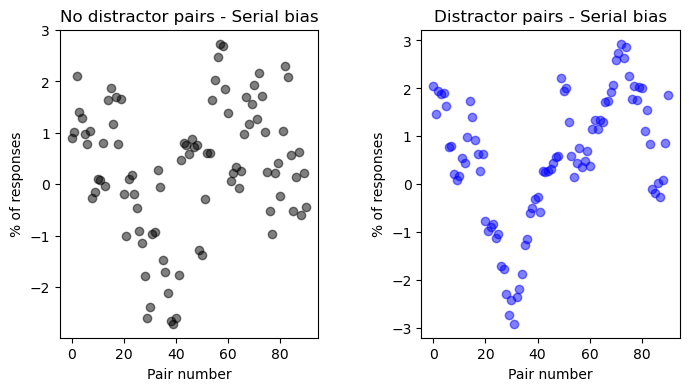

In [11]:
######################################
#Plotting the SERIAL BIAS

# Create the figure and axes for the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))


#### Serial Bias###
# Create an array of pair numbers for the control consition (no distractor)
pair_numbers = np.arange(len(no_distractor_sd))

# Plot the scatter plot of the pairs in series by their serial bias
axes[0].scatter(pair_numbers, no_distractor_sd, alpha=0.5, color = "black", label = "No distractor")

# Set the size, title and axis labels
axes[0].set_title("No distractor pairs - Serial bias")
axes[0].set_xlabel("Pair number")
axes[0].set_ylabel("% of responses")

#### Distracor pairs - Serial Bias### 
# Create an array of pair numbers for the control consition (no distractor)
pair_numbers_distractor_pairs = np.arange(len(distractor_distractor_sd))

# Plot the scatter plot of the pairs in series by their serial bias
axes[1].scatter(pair_numbers_distractor_pairs, distractor_distractor_sd, alpha=0.5, color ='blue', label = "Distractor pairs")

# Set the size, title and axis labels
axes[1].set_title("Distractor pairs - Serial bias")
axes[1].set_xlabel("Pair number")
axes[1].set_ylabel("% of responses")

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)




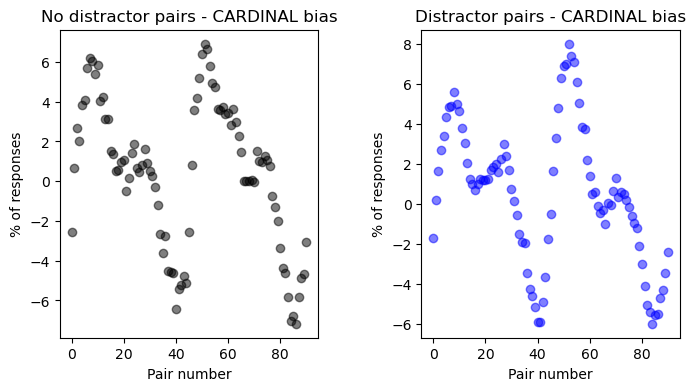

In [12]:
#####################################
#Plotting the CARDINAL BIAS

# Create the figure and axes for the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))


#### Serial Bias###
# Create an array of pair numbers for the control consition (no distractor)
pair_numbers = np.arange(len(no_distractor_cb))

# Plot the scatter plot of the pairs in series by their serial bias
axes[0].scatter(pair_numbers, no_distractor_cb, alpha=0.5, color = "black", label = "No distractor")

# Set the size, title and axis labels
axes[0].set_title("No distractor pairs - CARDINAL bias")
axes[0].set_xlabel("Pair number")
axes[0].set_ylabel("% of responses")

#### Distracor pairs - Serial Bias### 
# Create an array of pair numbers for the control consition (no distractor)
pair_numbers_distractor_pairs = np.arange(len(distractor_distractor_cb))

# Plot the scatter plot of the pairs in series by their serial bias
axes[1].scatter(pair_numbers_distractor_pairs, distractor_distractor_cb, alpha=0.5, color ='blue', label = "Distractor pairs")

# Set the size, title and axis labels
axes[1].set_title("Distractor pairs - CARDINAL bias")
axes[1].set_xlabel("Pair number")
axes[1].set_ylabel("% of responses")

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)



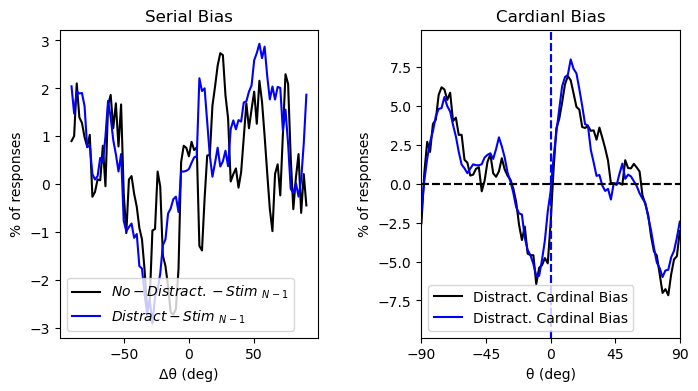

In [13]:
# Create a figure with two subplots side-by-side
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))

#Serial Bias - distractor vs. no distractor 
axs[0].plot(bns, no_distractor_sd, 'k', label='$No-Distract.-Stim~_{N-1}$')
axs[0].plot(bns, distractor_distractor_sd, 'b', label='$Distract-Stim~_{N-1}$')
axs[0].set_xlabel("Δθ (deg)")
axs[0].set_ylabel("% of responses")
SDF.d_plot(1, 9.9, -90)
axs[0].legend()
axs[0].set_title('Serial Bias')

#graph cardinal bias - distractor vs. no distractor 
axs[1].plot(bns, no_distractor_cb, color='k', label='Distract. Cardinal Bias')
axs[1].plot(bns, distractor_distractor_cb, color='b', label='Distract. Cardinal Bias')
axs[1].set_xlabel("θ (deg)")
axs[1].set_ylabel("% of responses")
SDF.d_plot(1, 9.9, -90)
axs[1].legend()
axs[1].set_title('Cardianl Bias')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()

#  Division by Kappa Value

- Filter the data based on kappa (50, 100, 5000) 
- Loop through trials, store data in a dataframe 
    - low - low 
    -  high - low 
    - high - high 
    - low - high 
    
  *This is across all trials (distractor and non-distractor) 
    

## Low - Low Kappa Pairs

In [14]:
# Initialize an empty list to store the distractor-distractor pair
low_low_pairs = []

# Loop through each row in the DataFrame
for i in range(1, len(data)):
    # Check if the distractor value is > 0 for both the current row and the previous row
    if data.iloc[i]["kappa"] > 0 and data.iloc[i-1]["kappa"] > 0:
        # If both have a distractor value > 0, append the entire row to the list
        low_low_pairs.append(data.iloc[i-1])
        low_low_pairs.append(data.iloc[i])
        
# Create a new DataFrame from the selected rows
low_low_data = pd.DataFrame(low_low_pairs)

# Print the list of distractor-distractor pairs
print(low_low_data.head())


   orient  distractor   kappa  subject   resp    respRT   acc  traj
0    47.0         0.0   100.0      2.0    NaN  0.000000   NaN   0.0
1   143.0         1.0  5000.0      2.0  153.0  2.423917  10.0  50.0
1   143.0         1.0  5000.0      2.0  153.0  2.423917  10.0  50.0
2    84.0         0.0    50.0      2.0    NaN  0.000000   NaN   0.0
2    84.0         0.0    50.0      2.0    NaN  0.000000   NaN   0.0


In [15]:
#low_low pairs
nb=-1
d_ori = SDF.get_nb(nb,low_low_data['orient'].values,1,ori_wrap) # dStim_nb
tmp_ori = SDF.wrap(low_low_data.orient * 2) / 2


n_bns = 91
bns = np.linspace(-90,90,n_bns)
overlap = 3

# ind = (np.isnan(data['acc']))
# tmp_data = data['acc'][ind==False]
# tmp_ori = data.orient[ind==False]
low_low_sd = SDF.do_bining(bns,overlap,d_ori,low_low_data['acc']*d2r2,want_var='circ_mean')*r2d2
low_low_cb = SDF.do_bining(bns,overlap,tmp_ori,low_low_data['acc']*d2r2,want_var='circ_mean')*r2d2


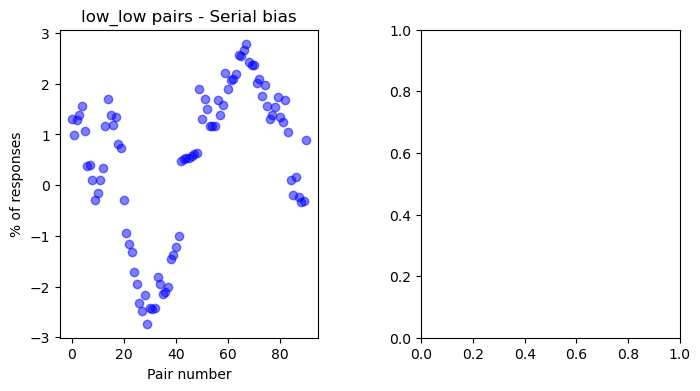

In [16]:
######################################
#Plotting the SERIAL BIAS

# Create the figure and axes for the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))


#### Serial Bias###
# Create an array of pair numbers for the control consition (no distractor)
pair_numbers = np.arange(len(low_low_sd))

# Plot the scatter plot of the pairs in series by their serial bias
axes[0].scatter(pair_numbers, low_low_sd, alpha=0.5, color = "blue", label = "low_low")

# Set the size, title and axis labels
axes[0].set_title("low_low pairs - Serial bias")
axes[0].set_xlabel("Pair number")
axes[0].set_ylabel("% of responses")

# #### Distracor pairs - Serial Bias### 
# # Create an array of pair numbers for the control consition (no distractor)
# pair_numbers_low_low_pairs = np.arange(len(low_low_sd))

# # Plot the scatter plot of the pairs in series by their serial bias
# axes[1].scatter(pair_numbers_low_low_pairs, low_low_sd, alpha=0.5, color ='blue', label = "low_low pairs")

# # # Set the size, title and axis labels
# # axes[1].set_title("low_low pairs - Serial bias")
# # axes[1].set_xlabel("Pair number")
# axes[1].set_ylabel("% of responses")

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)




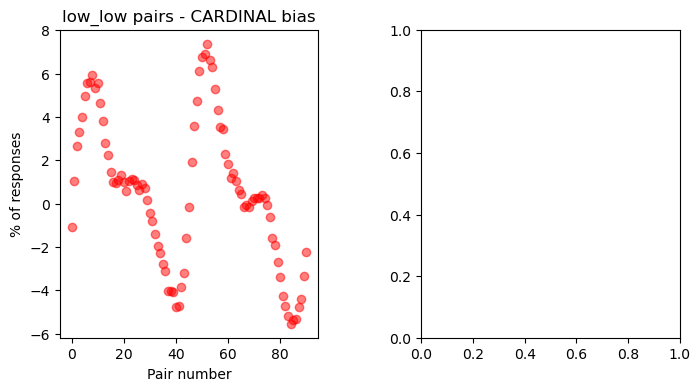

In [17]:
#####################################
#Plotting the CARDINAL BIAS

# Create the figure and axes for the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))


#### Serial Bias###
# Create an array of pair numbers for the control consition (no distractor)
pair_numbers = np.arange(len(low_low_cb))

# Plot the scatter plot of the pairs in series by their serial bias
axes[0].scatter(pair_numbers, low_low_cb, alpha=0.5, color = "red", label = "low_low")

# Set the size, title and axis labels
axes[0].set_title("low_low pairs - CARDINAL bias")
axes[0].set_xlabel("Pair number")
axes[0].set_ylabel("% of responses")

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)




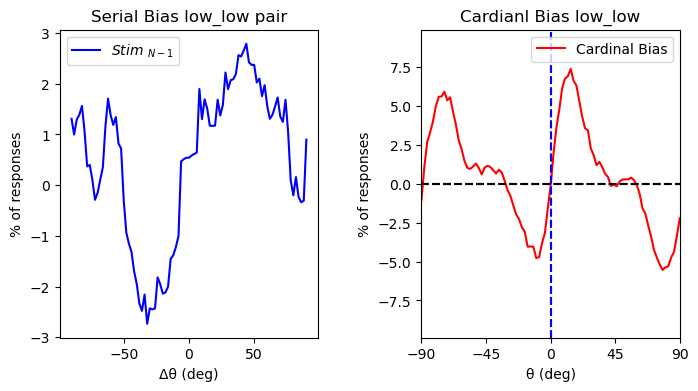

In [18]:
# Create a figure with two subplots side-by-side
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))

#Serial Bias - low-low pairs
axs[0].plot(bns, low_low_sd, 'b', label='$Stim~_{N-1}$')
# axs[0].plot(bns, distractor_distractor_sd, 'b', label='$Distract-Stim~_{N-1}$')
axs[0].set_xlabel("Δθ (deg)")
axs[0].set_ylabel("% of responses")
SDF.d_plot(1, 9.9, -90)
axs[0].legend()
axs[0].set_title('Serial Bias low_low pair')

#graph cardinal bias - distractor vs. no distractor 
axs[1].plot(bns, low_low_cb, color='r', label='Cardinal Bias')
# axs[1].plot(bns, distractor_distractor_cb, color='b', label='low_low Cardinal Bias')
axs[1].set_xlabel("θ (deg)")
axs[1].set_ylabel("% of responses")
SDF.d_plot(1, 9.9, -90)
axs[1].legend()
axs[1].set_title('Cardianl Bias low_low')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()

# High- high kappa

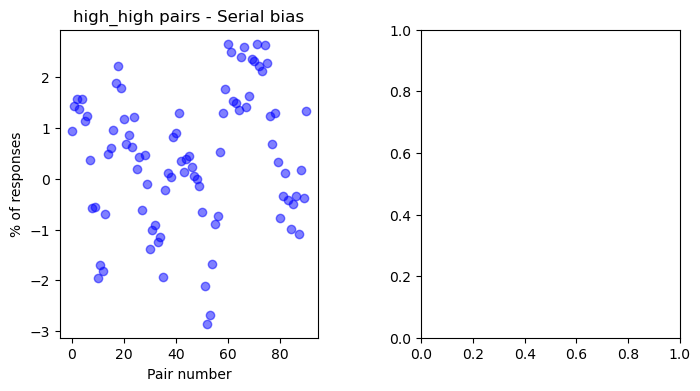

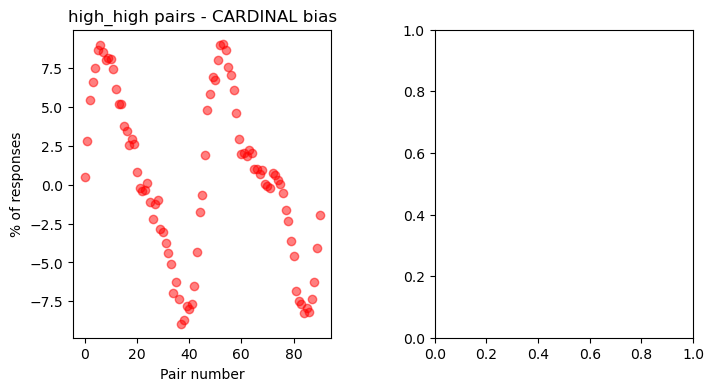

In [19]:
# Initialize an empty list to store the distractor-distractor pair
high_high_pairs = []

# Loop through each row in the DataFrame
for i in range(1, len(data)):
    # Check if the distractor value is > 0 for both the current row and the previous row
    if data.iloc[i]["kappa"] == 5000 and data.iloc[i-1]["kappa"] == 5000:
        # If both have a distractor value > 0, append the entire row to the list
        high_high_pairs.append(data.iloc[i-1])
        high_high_pairs.append(data.iloc[i])
        
# Create a new DataFrame from the selected rows
high_high_data = pd.DataFrame(high_high_pairs)


#bias plotting
nb=-1
d_ori = SDF.get_nb(nb,high_high_data['orient'].values,1,ori_wrap) # dStim_nb
tmp_ori = SDF.wrap(high_high_data.orient * 2) / 2


n_bns = 91
bns = np.linspace(-90,90,n_bns)
overlap = 3

# ind = (np.isnan(data['acc']))
# tmp_data = data['acc'][ind==False]
# tmp_ori = data.orient[ind==False]
high_high_sd = SDF.do_bining(bns,overlap,d_ori,high_high_data['acc']*d2r2,want_var='circ_mean')*r2d2
high_high_cb = SDF.do_bining(bns,overlap,tmp_ori,high_high_data['acc']*d2r2,want_var='circ_mean')*r2d2


######################################
#Plotting the SERIAL BIAS

# Create the figure and axes for the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))


#### Serial Bias###
# Create an array of pair numbers for the control consition (no distractor)
pair_numbers = np.arange(len(high_high_sd))

# Plot the scatter plot of the pairs in series by their serial bias
axes[0].scatter(pair_numbers, high_high_sd, alpha=0.5, color = "blue", label = "high_high")

# Set the size, title and axis labels
axes[0].set_title("high_high pairs - Serial bias")
axes[0].set_xlabel("Pair number")
axes[0].set_ylabel("% of responses")

# #### pairs - Serial Bias### 
# # Create an array of pair numbers for the control consition (no distractor)
# pair_numbers_low_low_pairs = np.arange(len(low_low_sd))

# # Plot the scatter plot of the pairs in series by their serial bias
# axes[1].scatter(pair_numbers_low_low_pairs, low_low_sd, alpha=0.5, color ='blue', label = "low_low pairs")

# # # Set the size, title and axis labels
# # axes[1].set_title("low_low pairs - Serial bias")
# # axes[1].set_xlabel("Pair number")
# axes[1].set_ylabel("% of responses")

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)

#####################################
#Plotting the CARDINAL BIAS

# Create the figure and axes for the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))


#### Serial Bias###
# Create an array of pair numbers for the control consition (no distractor)
pair_numbers = np.arange(len(high_high_cb))

# Plot the scatter plot of the pairs in series by their serial bias
axes[0].scatter(pair_numbers, high_high_cb, alpha=0.5, color = "red", label = "high_high")

# Set the size, title and axis labels
axes[0].set_title("high_high pairs - CARDINAL bias")
axes[0].set_xlabel("Pair number")
axes[0].set_ylabel("% of responses")

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)

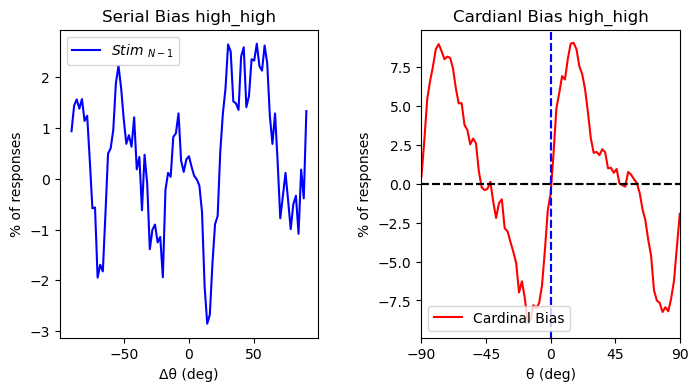

In [20]:
# Create a figure with two subplots side-by-side
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))

#Serial Bias - low-low pairs
axs[0].plot(bns, high_high_sd, 'b', label='$Stim~_{N-1}$')
# axs[0].plot(bns, distractor_distractor_sd, 'b', label='$Distract-Stim~_{N-1}$')
axs[0].set_xlabel("Δθ (deg)")
axs[0].set_ylabel("% of responses")
SDF.d_plot(1, 9.9, -90)
axs[0].legend()
axs[0].set_title('Serial Bias high_high')

#graph cardinal bias - distractor vs. no distractor 
axs[1].plot(bns, high_high_cb, color='r', label='Cardinal Bias')
# axs[1].plot(bns, distractor_distractor_cb, color='b', label='low_low Cardinal Bias')
axs[1].set_xlabel("θ (deg)")
axs[1].set_ylabel("% of responses")
SDF.d_plot(1, 9.9, -90)
axs[1].legend()
axs[1].set_title('Cardianl Bias high_high')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()

# Low-high kappa pairs 

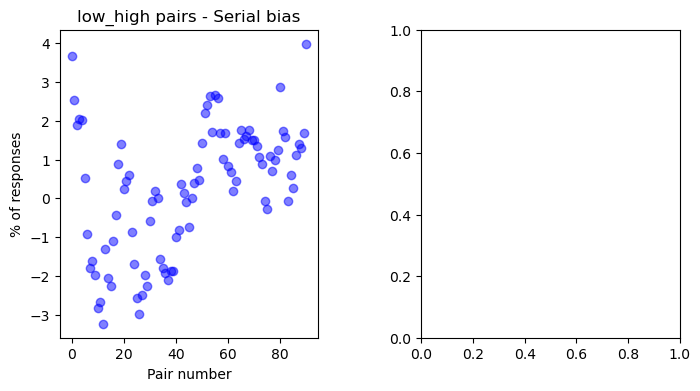

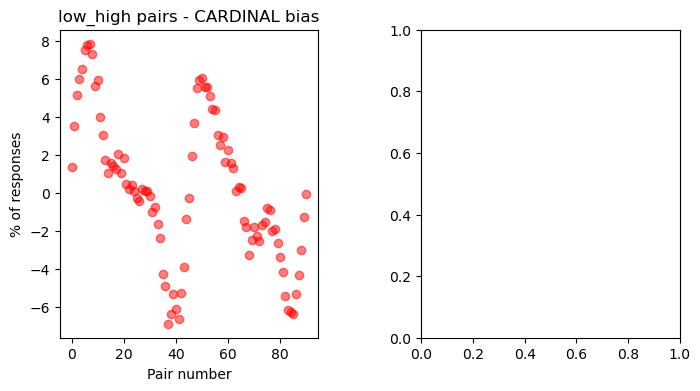

In [21]:
# Initialize an empty list to store the distractor-distractor pair
low_high_pairs = []

# Loop through each row in the DataFrame
for i in range(1, len(data)):
    # Check if the distractor value is > 0 for both the current row and the previous row
    if data.iloc[i]["kappa"] == 50 and data.iloc[i-1]["kappa"] == 5000:
        # If both have a distractor value > 0, append the entire row to the list
        low_high_pairs.append(data.iloc[i-1])
        low_high_pairs.append(data.iloc[i])
        
# Create a new DataFrame from the selected rows
low_high_data = pd.DataFrame(low_high_pairs)


#bias plotting
nb=-1
d_ori = SDF.get_nb(nb,low_high_data['orient'].values,1,ori_wrap) # dStim_nb
tmp_ori = SDF.wrap(low_high_data.orient * 2) / 2


n_bns = 91
bns = np.linspace(-90,90,n_bns)
overlap = 3

# ind = (np.isnan(data['acc']))
# tmp_data = data['acc'][ind==False]
# tmp_ori = data.orient[ind==False]
low_high_sd = SDF.do_bining(bns,overlap,d_ori,low_high_data['acc']*d2r2,want_var='circ_mean')*r2d2
low_high_cb = SDF.do_bining(bns,overlap,tmp_ori,low_high_data['acc']*d2r2,want_var='circ_mean')*r2d2


######################################
#Plotting the SERIAL BIAS

# Create the figure and axes for the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))


#### Serial Bias###
# Create an array of pair numbers for the control consition (no distractor)
pair_numbers = np.arange(len(low_high_sd))

# Plot the scatter plot of the pairs in series by their serial bias
axes[0].scatter(pair_numbers, low_high_sd, alpha=0.5, color = "blue", label = "low_high")

# Set the size, title and axis labels
axes[0].set_title("low_high pairs - Serial bias")
axes[0].set_xlabel("Pair number")
axes[0].set_ylabel("% of responses")

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)

#####################################
#Plotting the CARDINAL BIAS

# Create the figure and axes for the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

#### Serial Bias###
# Create an array of pair numbers for the control consition (no distractor)
pair_numbers = np.arange(len(low_high_cb))

# Plot the scatter plot of the pairs in series by their serial bias
axes[0].scatter(pair_numbers, low_high_cb, alpha=0.5, color = "red", label = "low_high")

# Set the size, title and axis labels
axes[0].set_title("low_high pairs - CARDINAL bias")
axes[0].set_xlabel("Pair number")
axes[0].set_ylabel("% of responses")

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)

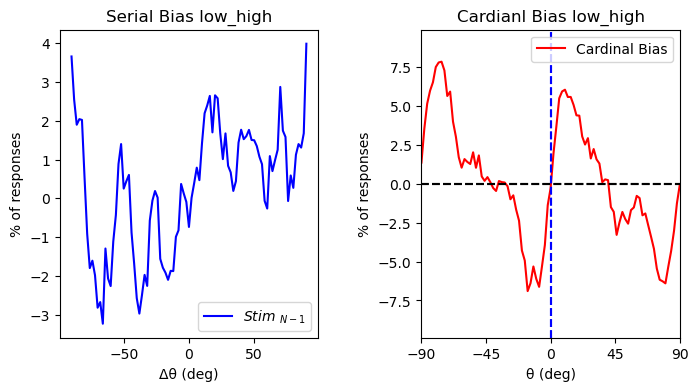

In [22]:
# Create a figure with two subplots side-by-side
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))

#Serial Bias - low-low pairs
axs[0].plot(bns, low_high_sd, 'b', label='$Stim~_{N-1}$')
# axs[0].plot(bns, distractor_distractor_sd, 'b', label='$Distract-Stim~_{N-1}$')
axs[0].set_xlabel("Δθ (deg)")
axs[0].set_ylabel("% of responses")
SDF.d_plot(1, 9.9, -90)
axs[0].legend()
axs[0].set_title('Serial Bias low_high')

#graph cardinal bias - distractor vs. no distractor 
axs[1].plot(bns, low_high_cb, color='r', label='Cardinal Bias')
# axs[1].plot(bns, distractor_distractor_cb, color='b', label='low_low Cardinal Bias')
axs[1].set_xlabel("θ (deg)")
axs[1].set_ylabel("% of responses")
SDF.d_plot(1, 9.9, -90)
axs[1].legend()
axs[1].set_title('Cardianl Bias low_high')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()

# High - low pairs 

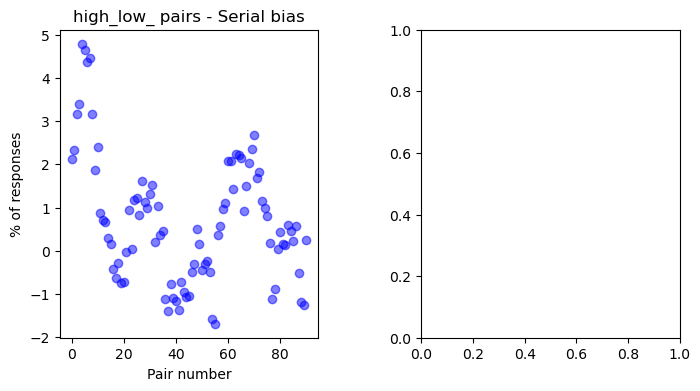

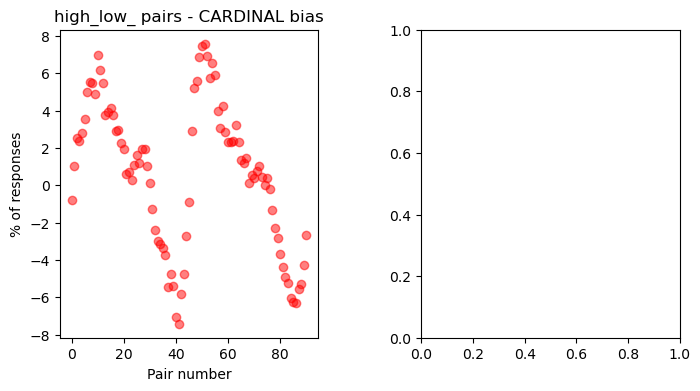

In [23]:
# Initialize an empty list to store the distractor-distractor pair
high_low_pairs = []

# Loop through each row in the DataFrame
for i in range(1, len(data)):
    # Check if the distractor value is > 0 for both the current row and the previous row
    if data.iloc[i]["kappa"] == 5000 and data.iloc[i-1]["kappa"] == 50:
        # If both have a distractor value > 0, append the entire row to the list
        high_low_pairs.append(data.iloc[i-1])
        high_low_pairs.append(data.iloc[i])
        
# Create a new DataFrame from the selected rows
high_low_data = pd.DataFrame(high_low_pairs)


#bias plotting
nb=-1
d_ori = SDF.get_nb(nb,high_low_data['orient'].values,1,ori_wrap) # dStim_nb
tmp_ori = SDF.wrap(high_low_data.orient * 2) / 2


n_bns = 91
bns = np.linspace(-90,90,n_bns)
overlap = 3

# ind = (np.isnan(data['acc']))
# tmp_data = data['acc'][ind==False]
# tmp_ori = data.orient[ind==False]
high_low_sd = SDF.do_bining(bns,overlap,d_ori,high_low_data['acc']*d2r2,want_var='circ_mean')*r2d2
high_low_cb = SDF.do_bining(bns,overlap,tmp_ori, high_low_data['acc']*d2r2,want_var='circ_mean')*r2d2


######################################
#Plotting the SERIAL BIAS

# Create the figure and axes for the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))


#### Serial Bias###
# Create an array of pair numbers for the control consition (no distractor)
pair_numbers = np.arange(len(high_low_sd))

# Plot the scatter plot of the pairs in series by their serial bias
axes[0].scatter(pair_numbers, high_low_sd, alpha=0.5, color = "blue", label = "high_low")

# Set the size, title and axis labels
axes[0].set_title("high_low_ pairs - Serial bias")
axes[0].set_xlabel("Pair number")
axes[0].set_ylabel("% of responses")

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)

#####################################
#Plotting the CARDINAL BIAS

# Create the figure and axes for the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

#### Serial Bias###
# Create an array of pair numbers for the control consition (no distractor)
pair_numbers = np.arange(len(high_low_cb))

# Plot the scatter plot of the pairs in series by their serial bias
axes[0].scatter(pair_numbers, high_low_cb, alpha=0.5, color = "red", label = "high_low")

# Set the size, title and axis labels
axes[0].set_title("high_low_ pairs - CARDINAL bias")
axes[0].set_xlabel("Pair number")
axes[0].set_ylabel("% of responses")

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)

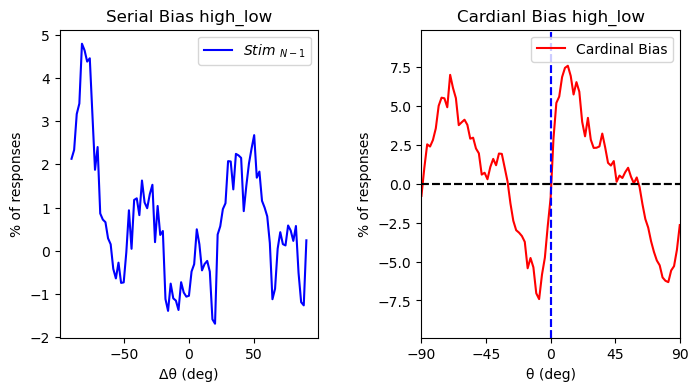

In [24]:
# Create a figure with two subplots side-by-side
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))

#Serial Bias - low-low pairs
axs[0].plot(bns, high_low_sd, 'b', label='$Stim~_{N-1}$')
# axs[0].plot(bns, distractor_distractor_sd, 'b', label='$Distract-Stim~_{N-1}$')
axs[0].set_xlabel("Δθ (deg)")
axs[0].set_ylabel("% of responses")
SDF.d_plot(1, 9.9, -90)
axs[0].legend()
axs[0].set_title('Serial Bias high_low')

#graph cardinal bias - distractor vs. no distractor 
axs[1].plot(bns, high_low_cb, color='r', label='Cardinal Bias')
# axs[1].plot(bns, distractor_distractor_cb, color='b', label='low_low Cardinal Bias')
axs[1].set_xlabel("θ (deg)")
axs[1].set_ylabel("% of responses")
SDF.d_plot(1, 9.9, -90)
axs[1].legend()
axs[1].set_title('Cardianl Bias high_low')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()

# High-High kappa without distractor

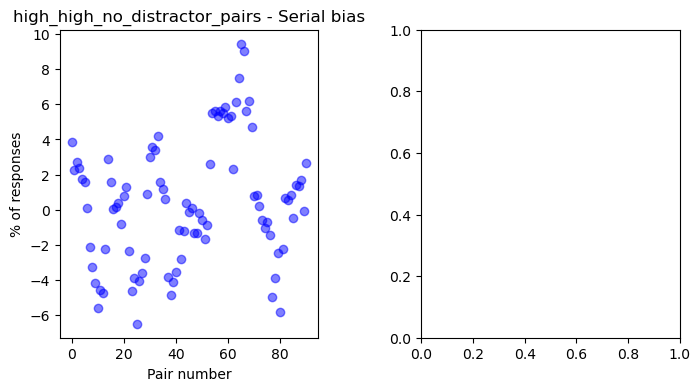

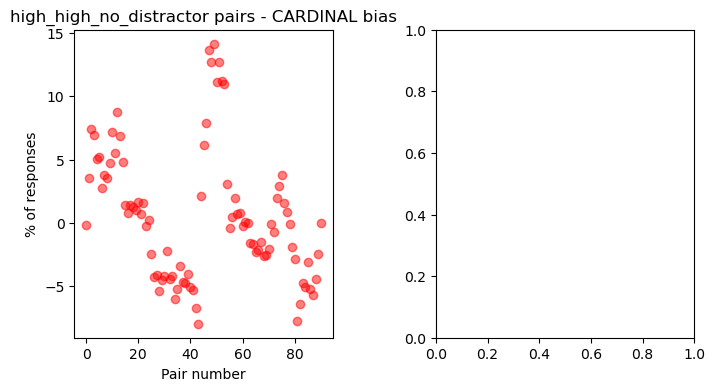

In [26]:
# Initialize an empty list to store the high-low kappa pairs with distractor = 0
high_high_no_distractor_pairs = []

# Loop through each row in the DataFrame
for i in range(1, len(data)):
    # Check if Kappa is 5000 and distractor is 0 for both the current row and the previous row
    if data.iloc[i]["kappa"] == 5000 and data.iloc[i]["distractor"] == 0 and data.iloc[i-1]["kappa"] == 5000 and data.iloc[i-1]["distractor"] == 0:
        # If the conditions are met, append the entire row to the list
        high_high_no_distractor_pairs.append(data.iloc[i-1])
        high_high_no_distractor_pairs.append(data.iloc[i])

# Create a new DataFrame from the selected rows
high_high_no_distractor_pairs_data = pd.DataFrame(high_high_no_distractor_pairs)

#bias plotting
nb=-1
d_ori = SDF.get_nb(nb,high_high_no_distractor_pairs_data['orient'].values,1,ori_wrap) # dStim_nb
tmp_ori = SDF.wrap(high_high_no_distractor_pairs_data.orient * 2) / 2


n_bns = 91
bns = np.linspace(-90,90,n_bns)
overlap = 3

# ind = (np.isnan(data['acc']))
# tmp_data = data['acc'][ind==False]
# tmp_ori = data.orient[ind==False]
high_high_no_distractor_sd = SDF.do_bining(bns,overlap,d_ori,high_high_no_distractor_pairs_data['acc']*d2r2,want_var='circ_mean')*r2d2
high_high_no_distractor_cb = SDF.do_bining(bns,overlap,tmp_ori, high_high_no_distractor_pairs_data['acc']*d2r2,want_var='circ_mean')*r2d2


######################################
#Plotting the SERIAL BIAS

# Create the figure and axes for the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))


#### Serial Bias###
# Create an array of pair numbers for the control consition (no distractor)
pair_numbers = np.arange(len(high_high_no_distractor_sd))

# Plot the scatter plot of the pairs in series by their serial bias
axes[0].scatter(pair_numbers, high_high_no_distractor_sd, alpha=0.5, color = "blue", label = "high_high_no_distractor")

# Set the size, title and axis labels
axes[0].set_title("high_high_no_distractor_pairs - Serial bias")
axes[0].set_xlabel("Pair number")
axes[0].set_ylabel("% of responses")

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)

#####################################
#Plotting the CARDINAL BIAS

# Create the figure and axes for the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

#### Serial Bias###
# Create an array of pair numbers for the control consition (no distractor)
pair_numbers = np.arange(len(high_high_no_distractor_cb))

# Plot the scatter plot of the pairs in series by their serial bias
axes[0].scatter(pair_numbers, high_high_no_distractor_cb, alpha=0.5, color = "red", label = "high_high_no_distractor")

# Set the size, title and axis labels
axes[0].set_title("high_high_no_distractor pairs - CARDINAL bias")
axes[0].set_xlabel("Pair number")
axes[0].set_ylabel("% of responses")

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)


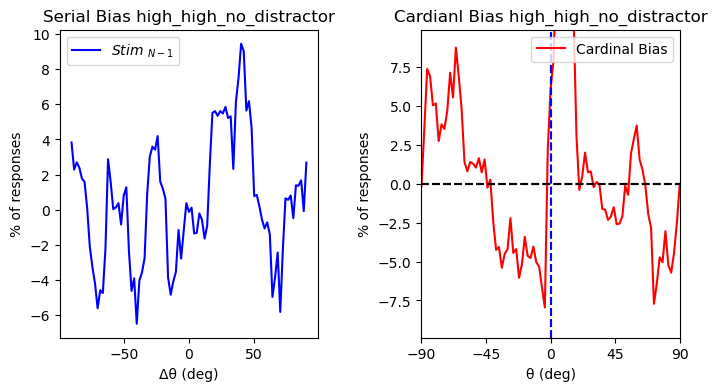

In [27]:
# Create a figure with two subplots side-by-side
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))

#Serial Bias - low-low pairs
axs[0].plot(bns, high_high_no_distractor_sd, 'b', label='$Stim~_{N-1}$')
# axs[0].plot(bns, distractor_distractor_sd, 'b', label='$Distract-Stim~_{N-1}$')
axs[0].set_xlabel("Δθ (deg)")
axs[0].set_ylabel("% of responses")
SDF.d_plot(1, 9.9, -90)
axs[0].legend()
axs[0].set_title('Serial Bias high_high_no_distractor')

#graph cardinal bias - distractor vs. no distractor 
axs[1].plot(bns, high_high_no_distractor_cb, color='r', label='Cardinal Bias')
# axs[1].plot(bns, distractor_distractor_cb, color='b', label='low_low Cardinal Bias')
axs[1].set_xlabel("θ (deg)")
axs[1].set_ylabel("% of responses")
SDF.d_plot(1, 9.9, -90)
axs[1].legend()
axs[1].set_title('Cardianl Bias high_high_no_distractor')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()

# High_high_Distractor 

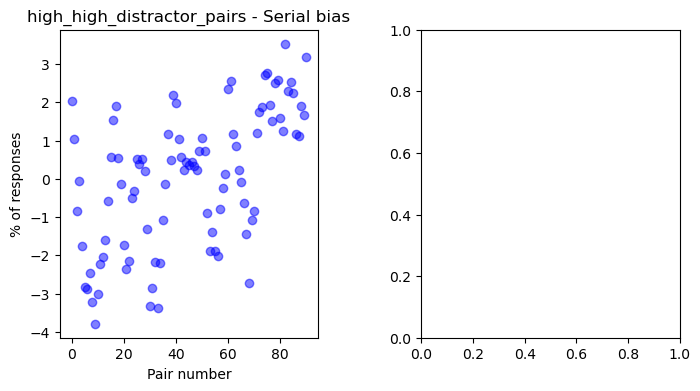

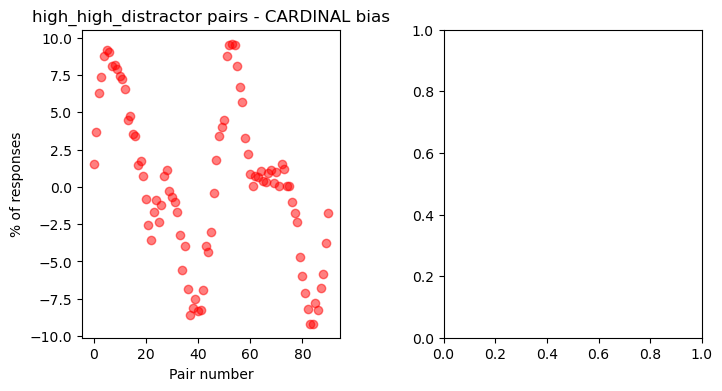

In [37]:
# Initialize an empty list to store the high-low kappa pairs with distractor = 0
high_high_distractor_pairs = []

# Loop through each row in the DataFrame
for i in range(1, len(data)):
    # Check if Kappa is 5000 and distractor is 0 for both the current row and the previous row
    if data.iloc[i]["kappa"] == 5000 and data.iloc[i]["distractor"] > 0 and data.iloc[i-1]["kappa"] == 5000 and data.iloc[i-1]["distractor"] > 0:
        # If the conditions are met, append the entire row to the list
        high_high_distractor_pairs.append(data.iloc[i-1])
        high_high_distractor_pairs.append(data.iloc[i])

# Create a new DataFrame from the selected rows
high_high_distractor_pairs_data = pd.DataFrame(high_high_distractor_pairs)

#bias plotting
nb=-1
d_ori = SDF.get_nb(nb,high_high_distractor_pairs_data['orient'].values,1,ori_wrap) # dStim_nb
tmp_ori = SDF.wrap(high_high_distractor_pairs_data.orient * 2) / 2


n_bns = 91
bns = np.linspace(-90,90,n_bns)
overlap = 3

# ind = (np.isnan(data['acc']))
# tmp_data = data['acc'][ind==False]
# tmp_ori = data.orient[ind==False]
high_high_distractor_sd = SDF.do_bining(bns,overlap,d_ori,high_high_distractor_pairs_data['acc']*d2r2,want_var='circ_mean')*r2d2
high_high_distractor_cb = SDF.do_bining(bns,overlap,tmp_ori, high_high_distractor_pairs_data['acc']*d2r2,want_var='circ_mean')*r2d2


######################################
#Plotting the SERIAL BIAS

# Create the figure and axes for the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))


#### Serial Bias###
# Create an array of pair numbers for the control consition (no distractor)
pair_numbers = np.arange(len(high_high_distractor_sd))

# Plot the scatter plot of the pairs in series by their serial bias
axes[0].scatter(pair_numbers, high_high_distractor_sd, alpha=0.5, color = "blue", label = "high_high_distractor")

# Set the size, title and axis labels
axes[0].set_title("high_high_distractor_pairs - Serial bias")
axes[0].set_xlabel("Pair number")
axes[0].set_ylabel("% of responses")

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)

#####################################
#Plotting the CARDINAL BIAS

# Create the figure and axes for the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

#### Serial Bias###
# Create an array of pair numbers for the control consition (no distractor)
pair_numbers = np.arange(len(high_high_distractor_cb))

# Plot the scatter plot of the pairs in series by their serial bias
axes[0].scatter(pair_numbers, high_high_distractor_cb, alpha=0.5, color = "red", label = "high_high_distractor")

# Set the size, title and axis labels
axes[0].set_title("high_high_distractor pairs - CARDINAL bias")
axes[0].set_xlabel("Pair number")
axes[0].set_ylabel("% of responses")

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)


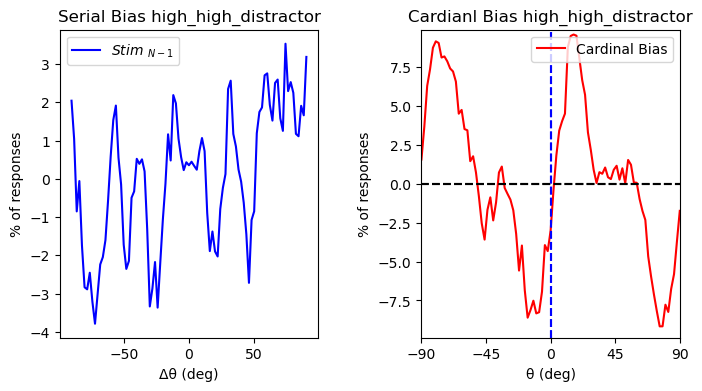

In [30]:
# Create a figure with two subplots side-by-side
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))

#Serial Bias - low-low pairs
axs[0].plot(bns, high_high_distractor_sd, 'b', label='$Stim~_{N-1}$')
# axs[0].plot(bns, distractor_distractor_sd, 'b', label='$Distract-Stim~_{N-1}$')
axs[0].set_xlabel("Δθ (deg)")
axs[0].set_ylabel("% of responses")
SDF.d_plot(1, 9.9, -90)
axs[0].legend()
axs[0].set_title('Serial Bias high_high_distractor')

#graph cardinal bias - distractor vs. no distractor 
axs[1].plot(bns, high_high_distractor_cb, color='r', label='Cardinal Bias')
# axs[1].plot(bns, distractor_distractor_cb, color='b', label='low_low Cardinal Bias')
axs[1].set_xlabel("θ (deg)")
axs[1].set_ylabel("% of responses")
SDF.d_plot(1, 9.9, -90)
axs[1].legend()
axs[1].set_title('Cardianl Bias high_high_distractor')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()

# Low-Low no distractor

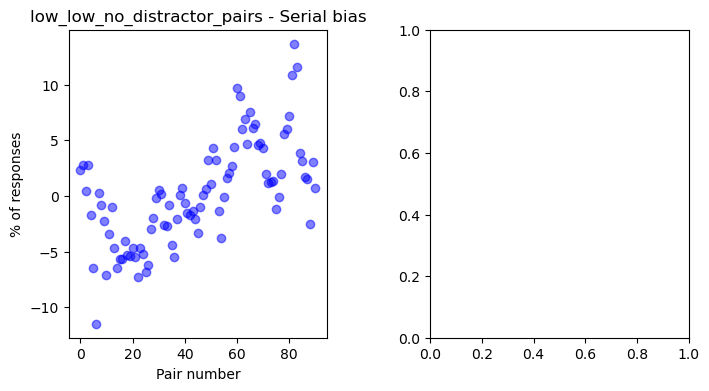

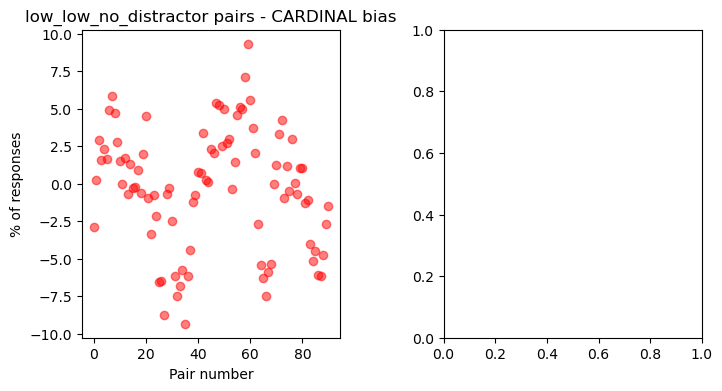

In [31]:
# Initialize an empty list to store the high-low kappa pairs with distractor = 0
low_low_no_distractor_pairs = []

# Loop through each row in the DataFrame
for i in range(1, len(data)):
    # Check if Kappa is 5000 and distractor is 0 for both the current row and the previous row
    if data.iloc[i]["kappa"] == 50 and data.iloc[i]["distractor"] == 0 and data.iloc[i-1]["kappa"] == 50 and data.iloc[i-1]["distractor"] == 0:
        # If the conditions are met, append the entire row to the list
        low_low_no_distractor_pairs.append(data.iloc[i-1])
        low_low_no_distractor_pairs.append(data.iloc[i])

# Create a new DataFrame from the selected rows
low_low_no_distractor_pairs_data = pd.DataFrame(low_low_no_distractor_pairs)

#bias plotting
nb=-1
d_ori = SDF.get_nb(nb,low_low_no_distractor_pairs_data['orient'].values,1,ori_wrap) # dStim_nb
tmp_ori = SDF.wrap(low_low_no_distractor_pairs_data.orient * 2) / 2


n_bns = 91
bns = np.linspace(-90,90,n_bns)
overlap = 3

# ind = (np.isnan(data['acc']))
# tmp_data = data['acc'][ind==False]
# tmp_ori = data.orient[ind==False]
low_low_no_distractor_sd = SDF.do_bining(bns,overlap,d_ori,low_low_no_distractor_pairs_data['acc']*d2r2,want_var='circ_mean')*r2d2
low_low_no_distractor_cb = SDF.do_bining(bns,overlap,tmp_ori, low_low_no_distractor_pairs_data['acc']*d2r2,want_var='circ_mean')*r2d2


######################################
#Plotting the SERIAL BIAS

# Create the figure and axes for the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))


#### Serial Bias###
# Create an array of pair numbers for the control consition (no distractor)
pair_numbers = np.arange(len(low_low_no_distractor_sd))

# Plot the scatter plot of the pairs in series by their serial bias
axes[0].scatter(pair_numbers, low_low_no_distractor_sd, alpha=0.5, color = "blue", label = "low_low_no_distractor")

# Set the size, title and axis labels
axes[0].set_title("low_low_no_distractor_pairs - Serial bias")
axes[0].set_xlabel("Pair number")
axes[0].set_ylabel("% of responses")

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)

#####################################
#Plotting the CARDINAL BIAS

# Create the figure and axes for the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

#### Serial Bias###
# Create an array of pair numbers for the control consition (no distractor)
pair_numbers = np.arange(len(low_low_no_distractor_cb))

# Plot the scatter plot of the pairs in series by their serial bias
axes[0].scatter(pair_numbers, low_low_no_distractor_cb, alpha=0.5, color = "red", label = "low_low_no_distractor")

# Set the size, title and axis labels
axes[0].set_title("low_low_no_distractor pairs - CARDINAL bias")
axes[0].set_xlabel("Pair number")
axes[0].set_ylabel("% of responses")

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)


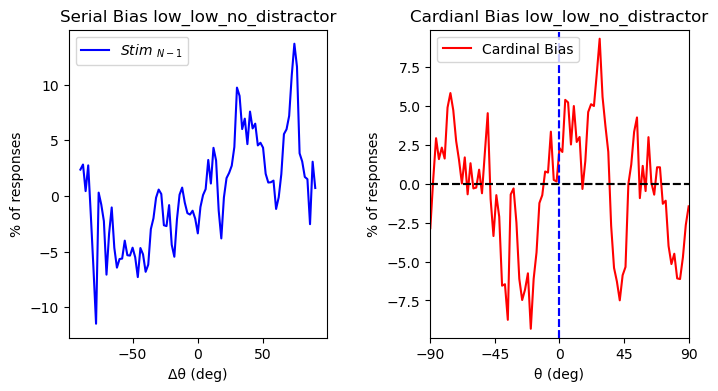

In [33]:
# Create a figure with two subplots side-by-side
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))

#Serial Bias - low-low pairs
axs[0].plot(bns, low_low_no_distractor_sd, 'b', label='$Stim~_{N-1}$')
# axs[0].plot(bns, distractor_distractor_sd, 'b', label='$Distract-Stim~_{N-1}$')
axs[0].set_xlabel("Δθ (deg)")
axs[0].set_ylabel("% of responses")
SDF.d_plot(1, 9.9, -90)
axs[0].legend()
axs[0].set_title('Serial Bias low_low_no_distractor')

#graph cardinal bias - distractor vs. no distractor 
axs[1].plot(bns, low_low_no_distractor_cb, color='r', label='Cardinal Bias')
# axs[1].plot(bns, distractor_distractor_cb, color='b', label='low_low Cardinal Bias')
axs[1].set_xlabel("θ (deg)")
axs[1].set_ylabel("% of responses")
SDF.d_plot(1, 9.9, -90)
axs[1].legend()
axs[1].set_title('Cardianl Bias low_low_no_distractor')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()

# Low-Low with Distractor

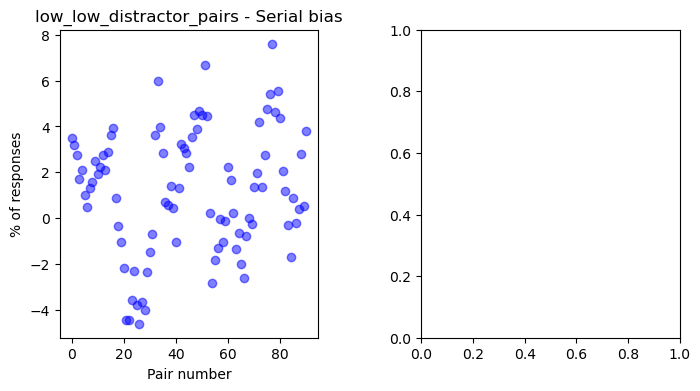

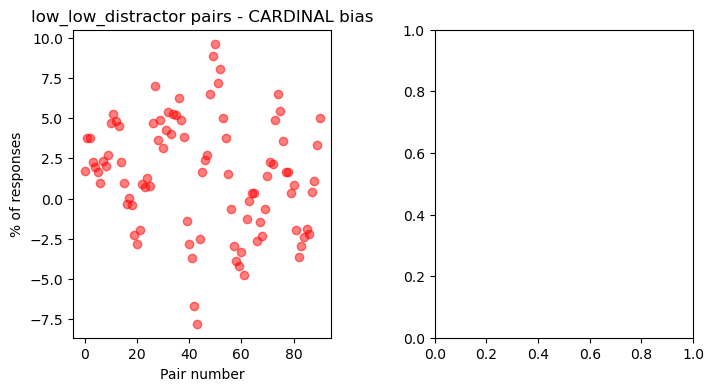

In [36]:
# Initialize an empty list to store the high-low kappa pairs with distractor = 0
low_low_distractor_pairs = []

# Loop through each row in the DataFrame
for i in range(1, len(data)):
    # Check if Kappa is 5000 and distractor is 0 for both the current row and the previous row
    if data.iloc[i]["kappa"] == 50 and data.iloc[i]["distractor"] > 0 and data.iloc[i-1]["kappa"] == 50 and data.iloc[i-1]["distractor"] > 0:
        # If the conditions are met, append the entire row to the list
        low_low_distractor_pairs.append(data.iloc[i-1])
        low_low_distractor_pairs.append(data.iloc[i])

# Create a new DataFrame from the selected rows
low_low_distractor_pairs_data = pd.DataFrame(low_low_distractor_pairs)

#bias plotting
nb=-1
d_ori = SDF.get_nb(nb,low_low_distractor_pairs_data['orient'].values,1,ori_wrap) # dStim_nb
tmp_ori = SDF.wrap(low_low_distractor_pairs_data.orient * 2) / 2


n_bns = 91
bns = np.linspace(-90,90,n_bns)
overlap = 3

# ind = (np.isnan(data['acc']))
# tmp_data = data['acc'][ind==False]
# tmp_ori = data.orient[ind==False]
low_low_distractor_sd = SDF.do_bining(bns,overlap,d_ori,low_low_distractor_pairs_data['acc']*d2r2,want_var='circ_mean')*r2d2
low_low_distractor_cb = SDF.do_bining(bns,overlap,tmp_ori, low_low_distractor_pairs_data['acc']*d2r2,want_var='circ_mean')*r2d2


######################################
#Plotting the SERIAL BIAS

# Create the figure and axes for the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))


#### Serial Bias###
# Create an array of pair numbers for the control consition (no distractor)
pair_numbers = np.arange(len(low_low_distractor_sd))

# Plot the scatter plot of the pairs in series by their serial bias
axes[0].scatter(pair_numbers, low_low_distractor_sd, alpha=0.5, color = "blue", label = "low_low_distractor")

# Set the size, title and axis labels
axes[0].set_title("low_low_distractor_pairs - Serial bias")
axes[0].set_xlabel("Pair number")
axes[0].set_ylabel("% of responses")

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)

#####################################
#Plotting the CARDINAL BIAS

# Create the figure and axes for the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

#### Serial Bias###
# Create an array of pair numbers for the control consition (no distractor)
pair_numbers = np.arange(len(low_low_distractor_cb))

# Plot the scatter plot of the pairs in series by their serial bias
axes[0].scatter(pair_numbers, low_low_distractor_cb, alpha=0.5, color = "red", label = "low_low_distractor")

# Set the size, title and axis labels
axes[0].set_title("low_low_distractor pairs - CARDINAL bias")
axes[0].set_xlabel("Pair number")
axes[0].set_ylabel("% of responses")

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)


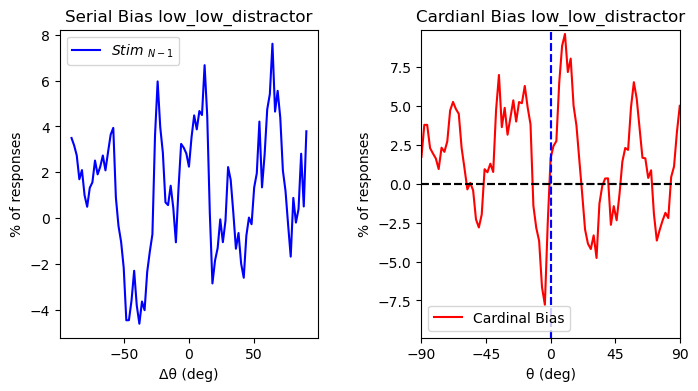

In [38]:
# Create a figure with two subplots side-by-side
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))

#Serial Bias - low-low pairs
axs[0].plot(bns,low_low_distractor_sd, 'b', label='$Stim~_{N-1}$')
# axs[0].plot(bns, distractor_distractor_sd, 'b', label='$Distract-Stim~_{N-1}$')
axs[0].set_xlabel("Δθ (deg)")
axs[0].set_ylabel("% of responses")
SDF.d_plot(1, 9.9, -90)
axs[0].legend()
axs[0].set_title('Serial Bias low_low_distractor')

#graph cardinal bias - distractor vs. no distractor 
axs[1].plot(bns, low_low_distractor_cb, color='r', label='Cardinal Bias')
# axs[1].plot(bns, distractor_distractor_cb, color='b', label='low_low Cardinal Bias')
axs[1].set_xlabel("θ (deg)")
axs[1].set_ylabel("% of responses")
SDF.d_plot(1, 9.9, -90)
axs[1].legend()
axs[1].set_title('Cardianl Bias low_low_distractor')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()